<a href="https://colab.research.google.com/github/SoshJam/Jove-CS3100-UofU/blob/master/For_CS3100_Fall2024/06_RE/ASSIGNMENT-3/u1431380_asg03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# If you want to clear outputs for a "fresh look", go to Edit and hit "clear outputs"
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --

from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa

from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import * #-- to check Even010 via RE and NFA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help

---------------------
---------------------

#### This assignment has a simple-to-state goal:
* Design a minimal DFA for the language
 $ Pattern_{010} =   ( \;\; \overline {\{0,1\}^* \; \{010\}\; \{0,1\}^* }\;\; (010) \;\; \overline {\{0,1\}^* \{010\}\{0,1\}^*} \;\; (010)\;\; )^*  $

---------------------
---------------------

#### $Pattern_{010}$ is the language of repeating blocks of 010, where each such block is preceded by any string from a language where 010 does not occur.

* Observe that there is no regular expression (RE) that directly captures $Pattern_{010}$.
* Your goal is to obtain that RE (which, for us, allows only union, concatenation and star) using the functions you'll be learning across the chapters
* Specifically, you'll be using these functions (and only these). You may **not design** any NFA or DFA from scratch using md2mc:

  - re2nfa
  - nfa2dfa
  - dfa2nfa
  - min_dfa or min_dfa_brz
  - mk_gnfa
  - del_gnfa_states which is to convert NFA to RE
  - comp_dfa

* Approach:
  - Obtain RE for the constituents of $Pattern_{010}$. Use only the above operations.
  - Name each constituent clearly - such as RE_first_block, RE_first_block_complement, etc.
     - RE_first_block = ...
     - RE_another_purpose = ...
  - Once all the REs are in place, use Python's String concatenation to form an RE for the whole $Pattern_{010}$.
    - Example: Pattern_010_RE = "(" + RE_First_Block + ... + ")"

* Then work on Pattern_010_RE to get the final answer DFA, the minimal DFA for it, _calling it_ **Pattern_010_Min_DFA**

* Document each step using a preceding text-box with a few lines of code

* I am leaving some space for you to simulate  **Pattern_010_Min_DFA**   on some "must accept" strings and "must reject" strings.

* You are to come up with a few additional test-strings also (at least two per class).

* **Much like in programming, debug each part thoroughly** but in a way specific to Jove. Here is a specific suggestion:
  - Suppose you think of only the first part of the repetition
  - i.e. Half_Pat =  $( \;\; \overline { \{0,1\}^* \; \{010\}\; \{0,1\}^* } \;\;\; (010) \;\; )^*  $,
  - then does the intersection of the DFA for Half_Pat and Pattern_010_RE make sense?  Does it help you check your work? Please do this and note down your observations.
  
#### There will be about 8-12 step depending on your approach. Some steps will take more work (such as del_gnfa_states). Those will have higher point-values. The exact number of steps will not be a criterion for grading, but rather how you document your steps.

#### **In your coding, you'll be using del_gnfa_states**. In that function, an array called DO[..] is used. Please list the contents of the array one-by-one. E.g. evaluate DO[0], then DO[1], etc, all the way to DO[size-1-of-DO] where size-1-of-DO is the DO size minus one.  The size-1-of-DO will be either the number of states of the starting NFA or maybe +/- 1 (please find out).

#### I'm asking you to evaluate DO[0], DO[1] etc in separate cells mainly to document the steps of the NFA to RE conversion that we will be studying in class. I.e. the final RE you need for your work does not need these intermediate arrays.

####  If there are repeating parts of a language (e.g. the complemented part) you should compute its RE only once and use it again.

#### **The final minimal DFA Pattern_010_Min_DFA will have exactly 28 states.** If you get this result, you should feel very good -- this is because minimal DFA are unique. Still you must document all intermediate steps to earn your points.

-------

##*What to submit*

### Please read Piazza note @121 that clarifies what to submit.

### Specifically:

#### * Download the ipynb
#### * Run all the tests and then File->Print to obtain a PDF
#### * Submit both the .ipynb and .pdf files


---------------------
---------------------

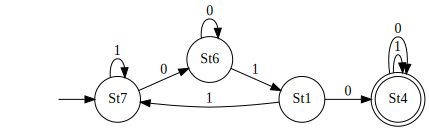

In [2]:
#  Goal: RE_Comp_010 - Represents every string that DOESN'T contain a 010 (the first block)

# Represents the language that contains all strings with 010
Has_010_RE = "(0+1)*(010)(0+1)*"

# Convert it to a minimized DFA
Has_010_NFA = re2nfa(Has_010_RE)
Has_010_DFA = nfa2dfa(Has_010_NFA)
Has_010_Min_DFA = min_dfa(Has_010_DFA)

# Let's see it
dotObj_dfa(Has_010_Min_DFA)

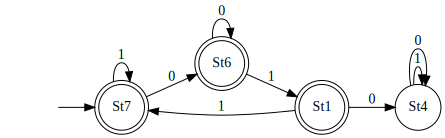

In [3]:
# We need the complement of that
Comp_010_Min_DFA = comp_dfa(Has_010_Min_DFA)
dotObj_dfa(Comp_010_Min_DFA)

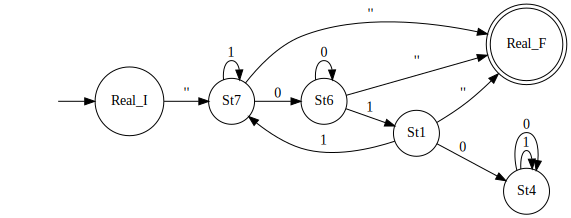

In [4]:
# Now we convert that to a RE. First we convert it to an NFA, then a GNFA
Comp_010_NFA = dfa2nfa(Comp_010_Min_DFA)
Comp_010_GNFA = mk_gnfa(Comp_010_NFA)

dotObj_gnfa(Comp_010_GNFA)

**** Eliminating state St7 ****
**** Eliminating state St6 ****
**** Eliminating state St4 ****
**** Eliminating state St1 ****


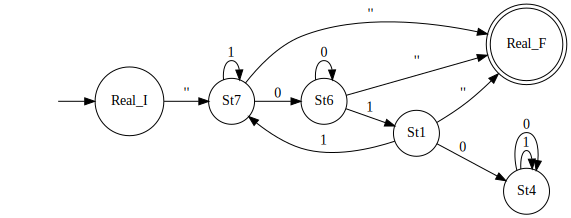

In [5]:
# Now we remove all of the states except the initial and final to see the regex to get there
(Gfinal, DO, Comp_010_RE) = del_gnfa_states(Comp_010_GNFA)

# Let's see how that worked
DO[0]

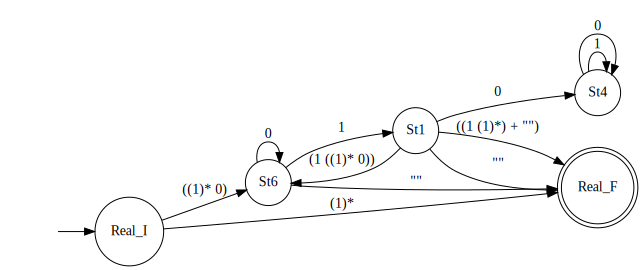

In [6]:
DO[1]

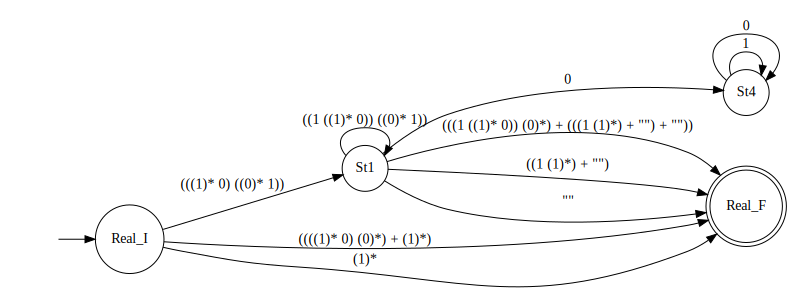

In [7]:
DO[2]

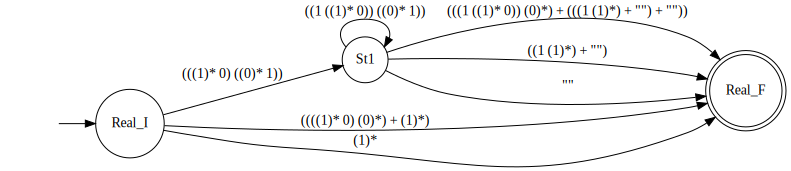

In [8]:
DO[3]

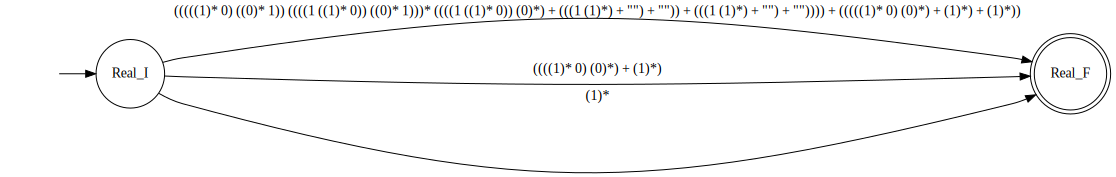

In [9]:
DO[4]

In [10]:
# So or final RE for this section is:
Comp_010_RE

'((((((1)* 0) ((0)* 1)) ((((1 ((1)* 0)) ((0)* 1)))* ((((1 ((1)* 0)) (0)*) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + "")))) + (((((1)* 0) (0)*) + (1)*) + (1)*)) + (((((1)* 0) (0)*) + (1)*) + (1)*))'

In [11]:
# The rest of the pattern is easy to construct. We just need to concatenate... that... with some much simpler segments of code.

# For the 010 between the blocks, that's a simple concatenation.
Group_010_RE = "(010)"

# So the final pattern is just two of each block, wrapped in a ()* to let it repeat.
Pattern_010_RE = "(" + Comp_010_RE + Group_010_RE + Comp_010_RE + Group_010_RE + ")*"

Pattern_010_RE

'(((((((1)* 0) ((0)* 1)) ((((1 ((1)* 0)) ((0)* 1)))* ((((1 ((1)* 0)) (0)*) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + "")))) + (((((1)* 0) (0)*) + (1)*) + (1)*)) + (((((1)* 0) (0)*) + (1)*) + (1)*))(010)((((((1)* 0) ((0)* 1)) ((((1 ((1)* 0)) ((0)* 1)))* ((((1 ((1)* 0)) (0)*) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + "")))) + (((((1)* 0) (0)*) + (1)*) + (1)*)) + (((((1)* 0) (0)*) + (1)*) + (1)*))(010))*'

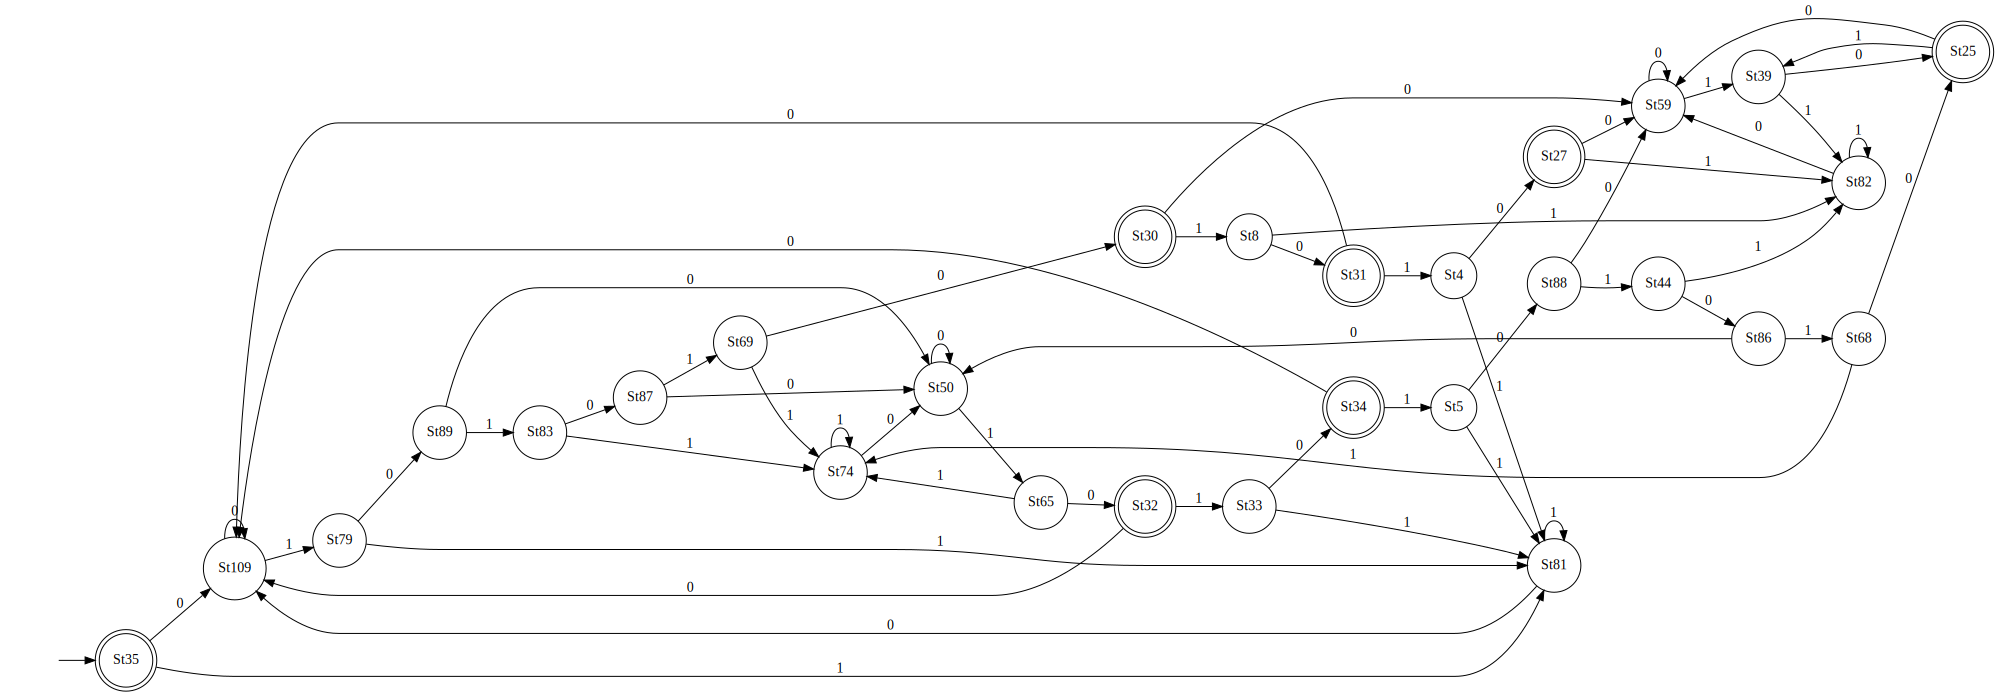

In [12]:
# Now we just need to find a minimal DFA for that:

Pattern_010_NFA = re2nfa(Pattern_010_RE)
Pattern_010_DFA = nfa2dfa(Pattern_010_NFA)
Pattern_010_Min_DFA = min_dfa(Pattern_010_DFA)

dotObj_dfa(Pattern_010_Min_DFA, FuseEdges=True)

In [13]:
# Also I would just like to say that I didn't understand the assignment first and thought we were supposed to compute the Pattern_010_RE by hand,
# and my solution is equivalent and better anyway B)((''+1)
# (0+(111*))*(''+1)(010)(''+1)(0+(111*))*(''+1)(010))*

### There will be many steps. Document each clearly, numbering them sequentually in Markdown


#### *HINT* : The only machine for which we defined complementation is a DFA. That is a key step in places where the language expression in question is under a complementation.

### FOR EACH TEST, create this cell below and fill with the test (accepting or rejecting). Document the test.

#### Run the test and show where the machine stop - accepting (green) or rejecting (red).


------------------
------------------



#### Your tests must include these MustPass strings (I'm putting blanks for readability - remove the embedded blanks before running the tests)

* 010   010       
       
* 01     010   101   010  

* 1      010   101   010  

* 110    010   001   010

* 010 1010

*  0101 010 1010 010


#### Extra testing is OK, mark them as such and put them after the "must pass" list.

### *Each test must be put into window that AnimateDFA opens when you run it*

#### Create one copy of the AnimateDFA cells (including the from jove.AnimateDFA import * and display(HTML...) in each cell. Then in that cell, when run, input the test. Run the  test. Submit a "finished" ipynb that captures all the run results.






In [14]:
MustPass = [
    "010010",
    "01010101010",
    "1010101010",
    "110010001010",
    "0101010",
    "01010101010010",
    "" # empty string should pass too
]

In [15]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

 "help(AnimateDFA)" gives you info on how to use animations with DFA 


In [16]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [17]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [18]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [19]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [20]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [21]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [22]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))


## Your tests must also include these MustFail  (add one more to make three). Blanks added for readability only! A few more than three is OK. Mark it as "extra ones from your side".


### 010    010   010  010 010

### 010010 010   010010  010 1

## 1



In [23]:
MustFail = [
    "010010010010010",
    "0100100100100100101",
    "1111101011111101011111010" # extra one. 1.5 patterns
]

In [24]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [25]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [26]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# END